In [81]:
import pandas as pd
import numpy as np


In [82]:
filepath = "train.csv"
df = pd.read_csv(filepath)

Drop FireplaceQu, PoolQC, Fence, MiscFeature, Alley

In [4]:
# old version
df = df.drop(['Alley'],axis=1)
df = df.drop(['PoolQC'],axis=1)
df = df.drop(['Fence'],axis=1)
df = df.drop(['FireplaceQu'],axis=1)

In [83]:
# new version
df = df.drop(['PoolQC'],axis=1)
df = df.drop(['FireplaceQu'],axis=1)
df = df.drop(['MiscFeature'],axis=1)

Label encoding

In [84]:
df = df.fillna(df.mean())
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [5]:
!pip install xgboost

mkl-random 1.0.1 requires cython, which is not installed.
tensorflow 1.11.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.4.3 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(preprocessing.LabelEncoder().fit_transform)


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
y = df['SalePrice']
X = df.drop(['SalePrice'],axis=1)
train_X, test_X, train_y, test_y = train_test_split(X.values,y.values, test_size=.2)

In [134]:
import xgboost as xgb
my_model= xgb.XGBRegressor(n_estimators=3000, learning_rate=0.025)

In [135]:
my_model.fit(train_X, train_y, early_stopping_rounds=500, eval_set=[(test_X, test_y)],verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.025, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
#testing where the largest error is
err_marg = 210
for i in range (0,292):
    if (abs(test_y[i] - predictions[i])>err_marg):
        print(i)


In [12]:
print("test is",test_y[62]," and prediction ",predictions[62])
abs(test_y[62] - predictions[62])>180

test is 251  and prediction  227.12257


False

In [136]:
# make predictions to evaluate
# standard, no tuning -> 35.98 & 2334.3
# n_est = 1000, early_stopping_round = 5 -> 35.6 & 2290.3
# n_est = 1000, early_stopping_round = 5, learning_rate = 0.05 -> 35.3 & 2235.4
# n_est = 1000, early_stopping_round = 5, learning_rate = 0.05 (drop new version) -> 34.1 & 2148.0
# n_est = 2000, early_stopping_round = 100, learning_rate = 0.05 (drop new version) -> 32.8 & 2074.1
# n_est = 2000, early_stopping_round = 300, learning_rate = 0.03 (drop new version) -> 34.0 & 1901.4
# n_est = 2000, early_stopping_round = 500, learning_rate = 0.025 (drop new version) -> 33.4 & 1848.9
predictions = my_model.predict(test_X)
# mean absolute error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error : ' + str(mean_absolute_error(predictions, test_y)))
# mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error: ' + str(mean_squared_error(predictions, test_y)))

Mean Absolute Error : 33.3665891281546
Mean Squared Error: 1848.9508631564734


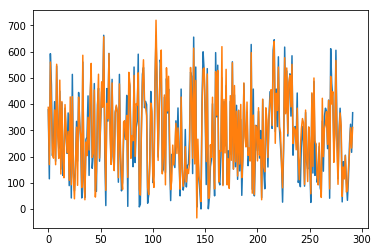

In [97]:
import matplotlib.pyplot  as plt
plt.plot(test_y)
plt.plot(predictions)
plt.show()

/home/chrolss/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


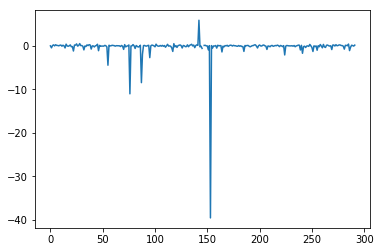

In [98]:
plt.plot((test_y - predictions)/test_y)
plt.show()

In [141]:
# START PREDICTING THE COMPETITION DATA
testFile = "test.csv"

test_data = pd.read_csv(testFile)

In [142]:
# Manipulate the data by dropping unwanted columns
test_data = test_data.drop(['PoolQC'],axis=1)
test_data = test_data.drop(['FireplaceQu'],axis=1)
test_data = test_data.drop(['MiscFeature'],axis=1)

In [143]:
test_data = test_data.reindex(X.columns, axis=1)

In [144]:
# Labelencode the data that is missing

test_data = test_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
test_data = test_data.apply(preprocessing.LabelEncoder().fit_transform)

In [150]:
test_data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,2,56,777,1,0,3,3,0,...,0,0,18,0,2,0,5,4,8,4


In [145]:
# Make competition prediction
test_preds = my_model.predict(test_data.values)

In [146]:
# Save prediction to competition submission file
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds*1000})

output.to_csv('submission.csv', index=False)